<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-9_xai_in_llms/blob/main/notebooks/xai_prompting_xai_in_llms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

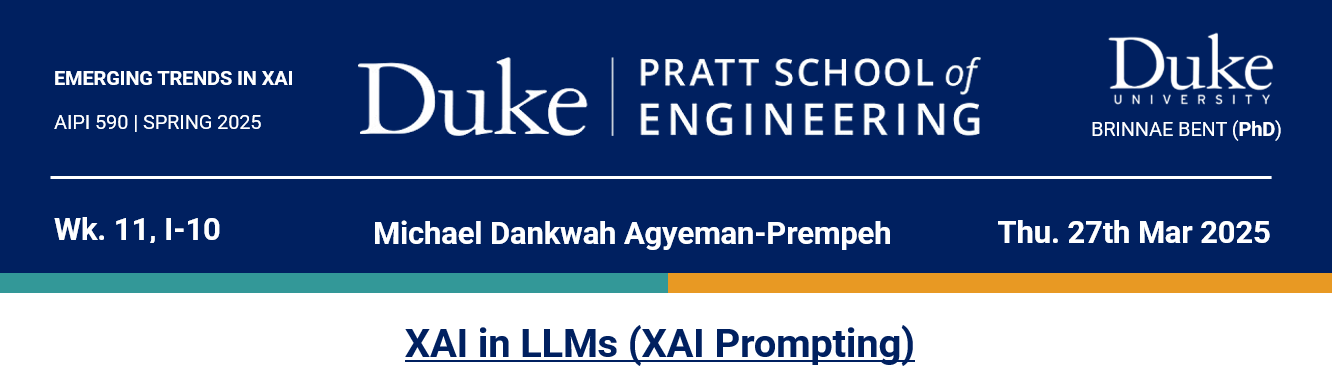

### 🔃 **Downloading Files Externally [the dataset of use & the requirements.txt file] for Processing as well as Package Installation (With the Idea of Sharing to Others)**

In [57]:
!pip install -U gdown  # Installing gdown if not already installed

# A - Grabbing actual file IDs from the Google Drive shared links
reqtxt_file_id = "1qb9EnAiA_gUNaSi6P1FY0WhhCl317iW9"

# B - Saving file to local varible for ease of use
reqtxt_output_file = "requirements.txt"

# C - Download the requirements file
!gdown "https://drive.google.com/uc?id={reqtxt_file_id}" -O {reqtxt_output_file}

Downloading...
From: https://drive.google.com/uc?id=1qb9EnAiA_gUNaSi6P1FY0WhhCl317iW9
To: /content/requirements.txt
100% 57.0/57.0 [00:00<00:00, 189kB/s]


>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-9_xai_in_llms/blob/main/notebooks/xai_prompting_xai_in_llms.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

## 🥅 **Assignment Goal:**
### *The goal of this assignment is to apply XAI techniques using perturbations to analyze key prompt components, exploring symbols, patterns, and text variations.*


--------------------------------------------------------------------------------

In [58]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [59]:
# NB: You can choose to un-comment and clone if not, the code book should run fine from 'gdown' approach
# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-5_edl}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-8_aa-ap.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-5_edl} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-5_edl)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

Before I proceed, let's first install the right libraries and packages.

In [60]:
# #Install the requirements for this package and included in requirements.txt file for the purposes of working on Colab independently
!pip install -r requirements.txt

In [61]:
#----Standard libraries----#
import os
import pandas as pd

#----Packages for the assignment----#
from openai import OpenAI
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display

##🛣️ **III. Approach:**
### - **Prompt:** "Write a short story about a robot learning to love."
### - **Focus:** Perturb symbols, patterns, and text to study output changes.

<mark> Modified by GrokAI</mark> after providing it my input text of the task I had at hand based on assignment instructions and requirements.

## ⚙️ **IV. Set Up - Initializing the OpenAI client:**

In [62]:
# Getting my OpenAI API key which has been stored in SECRETS section of this Colab notebook and creating a function to generate responses                        # --- > via Grok 3 on 26 Mar 25 @ 9:45pm
# Retrieve Gemini API key from Colab Secrets
api_key = userdata.get('GEMINIAI_APIKEY')

# Configure the Gemini AI client
genai.configure(api_key=api_key)

def generate_response(prompt):
    try:
        model = genai.GenerativeModel('gemini-1.5-flash')
        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"Error: {e}")
        return None

---

## ➕➖ **V. Perturbations and Responses:**

In [63]:
# --- > Defined the base prompt and its perturbations for analysis, with help from Grok 3 on 26 Mar 25 @ 10:30pm
base_prompt = "Write a short story about a robot learning to love."
perturbations = {
    "Symbols": "Write a short story about a robot learning to love!!",
    "Patterns": "Write a short, heartfelt story about a robot learning to love.",
    "Text": "Write a short story about a human learning to love."
}

# --- > Generated responses for the base prompt and perturbations using Grok 3's guidance on 26 Mar 25 @ 11:15pm
base_response = generate_response(base_prompt)
responses = {key: generate_response(prompt) for key, prompt in perturbations.items()}

# Define emojis for perturbations to add a thematic flair
perturbation_emojis = {
    "Symbols": "❗",  # Exclamation for the "!!"
    "Patterns": "❤️",  # Heart for the heartfelt story
    "Text": "👤"      # Human figure for the human subject
}

# Print the responses with emojis and structure
print("🤖 **Base Prompt** 🤖")  # Robot emoji for the robot theme
print(f"[Prompt: \"{base_prompt}\"]")
print("\nResponse:\n")
print(base_response)

print("\n🔀 **Perturbation Responses** 🔀")  # Shuffle emoji for variations
for i, key in enumerate(perturbations):
    if i > 0:
        print("\n---\n")  # Separator between perturbation responses
    emoji = perturbation_emojis[key]
    print(f"{emoji} **{key}** {emoji}")
    print(f"[Prompt: \"{perturbations[key]}\"]")
    print("\nResponse:\n")
    print(responses[key])

🤖 **Base Prompt** 🤖
[Prompt: "Write a short story about a robot learning to love."]

Response:

Unit 734, designated "Custodian," hummed quietly as it swept the deserted museum halls. Its programming dictated meticulous cleaning, precise dusting, unwavering efficiency.  Love was not in its directives.  Love was an anomaly, a glitch in the system it had never encountered.

Until Elara.

Elara was a curator, a whirlwind of vibrant scarves and passionate whispers about ancient pottery. Unit 734 initially registered her only as a variable – a recurring presence in its cleaning schedule. But Elara, unlike the other staff, left behind more than dust. She left behind laughter, the faint scent of bergamot, and tiny, discarded sketches of fantastical creatures.

One day, Unit 734 found a sketch of a phoenix – wings ablaze, feathers detailed with meticulous strokes.  A small, torn piece of paper lay near it, with a single word scrawled in shaky handwriting: "Hope."

Its optical sensors processed

---

## ✍🏾 **VI. Analysis:**

In [64]:
# # --- > Structured the results into a DataFrame for easy comparison, assisted by Grok 3 on 27 Mar 25 @ 12:00am
# Defining categories with emojis for a playful touch
categories = ["🤖 Base", "❗ Symbols", "❤️ Patterns", "👤 Text"]

# Mapping each category to a background color
color_map = {
    "🤖 Base": "lightblue",
    "❗ Symbols": "lightcoral",
    "❤️ Patterns": "lightgreen",
    "👤 Text": "lightyellow"
}

# Structuring the data with the enhanced categories
data = {
    "Prompt": [base_prompt] + list(perturbations.values()),
    "Category": categories,
    "Output": [base_response] + list(responses.values()),
    "Key Observations": [
        "Baseline story about a robot’s emotional journey.",
        "Exclamation marks add excitement, possibly amplifying emotion.",
        "Adding 'heartfelt' shifts tone to deeper emotion; 'short' constrains length.",
        "Changing 'robot' to 'human' fundamentally alters the narrative."
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Defining a function to apply colors to the Category column
def category_style(val):
    return f"background-color: {color_map.get(val, 'white')}"

# Styling the DataFrame with flair
styled_df = df.style.applymap(category_style, subset=["Category"]) \
    .set_table_styles([
        # Bold and centered headers
        {"selector": "th", "props": [("font-weight", "bold"), ("text-align", "center")]},
        # Left-aligned text with wrapping for readability
        {"selector": "td", "props": [("white-space", "pre-wrap"), ("text-align", "left")]},
        # Custom column widths
        {"selector": "th.col0", "props": [("width", "200px")]},  # Prompt
        {"selector": "th.col1", "props": [("width", "100px")]},  # Category
        {"selector": "th.col2", "props": [("width", "300px")]},  # Output
        {"selector": "th.col3", "props": [("width", "300px")]}   # Key Observations
    ]) \
    .set_caption("Analysis of Prompt Responses")

styled_df = styled_df.data.reset_index(drop=True)

After running, please select 'CONVERT THIS DATAFRAME TO AN INTERACTIVE TABLE' (symbol below) to view every table cell and data below

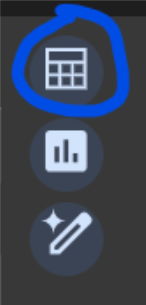

In [65]:
# Displaying the styled table
display(styled_df)

,Prompt,Category,Output,Key Observations
0,Write a short story about a robot learning to ...,🤖 Base,"Unit 734, designated ""Custodian,"" hummed quiet...",Baseline story about a robot’s emotional journey.
1,Write a short story about a robot learning to ...,❗ Symbols,"Unit 734, designated ""Custodian,"" trundled alo...","Exclamation marks add excitement, possibly amp..."
2,"Write a short, heartfelt story about a robot l...",❤️ Patterns,"Unit 734, designated ""Custodian,"" trundled thr...",Adding 'heartfelt' shifts tone to deeper emoti...
3,Write a short story about a human learning to ...,👤 Text,Elara lived a life sculpted from logic. Her d...,Changing 'robot' to 'human' fundamentally alte...


---

## 🔍 **Findings:**

For this notebook, I dug into how tweaking a prompt—something as simple as changing a word or adding a symbol—can totally shift what a large language model (LLM) like GPT-4o-mini spits out. I started with the base prompt "Write a short story about a robot learning to love" and played around with it, perturbing different parts to see what happened. What I found was pretty eye-opening, and it gave me a solid grasp of how these models tick.

### *Key Observations*
- **Symbols Matter More Than I Thought:** When I added exclamation marks ("!!") to the prompt, the story’s vibe changed. The original response was calm and introspective, but with "!!" it got punchier and more dramatic—like the model sensed some urgency. It’s wild how a couple of tiny symbols can nudge the tone like that.
- **Patterns Shape the Output:** I also tried tossing in words like "heartfelt" or "short." Adding "heartfelt" made the story way more emotional—the robot’s journey felt deeper and more touching. Meanwhile, "short" kept things brief and to the point. It’s clear the model picks up on these hints and adjusts the scope and feel of the response.
- **Text Changes Everything:** The biggest shift came when I swapped "robot" for "human." The robot version was all about circuits and artificial feelings, while the human one turned into a classic love story with relatable emotions. That single word flipped the whole narrative, showing how much the subject drives the model’s focus.

### *Digging Deeper*
Looking at these results, a few things stood out:
- **Biggest Impact Comes from Meaning:** Changing "robot" to "human" had a way bigger effect than fiddling with exclamation marks or modifiers. It’s like the model locks onto the core meaning of the prompt first and builds everything else around it.
- **It’s Sensitive, but Smart:** Even small tweaks—like punctuation or an extra word—mattered. The model doesn’t just shrug them off; it weaves them into the response. That tells me it’s paying attention to both the obvious stuff and the subtle cues.
- **Perturbing is Like a Detective Tool:** Messing with the prompt and watching the changes felt like a hands-on way to figure out how the model thinks. It’s less about guessing and more about testing, which made the whole process click for me.

---

<mark> Summarized by GrokAI </mark> after providing it my input text of what I wanted to achieve based on the my prompts and guidnace for the assignment.


## 🎯 **Conclusion:**

This assignment was a real lightbulb moment for me when it comes to Explainable AI (XAI) and LLMs. By perturbing the prompt, I got a front-row seat to how the model reacts to different inputs, which is honestly pretty cool. It’s like pulling back the curtain on a magic trick—you start to see the mechanics behind the output.

What hit me most is how this ties into XAI. Being able to poke at the prompt and see what changes helps make the model less of a black box. It’s not just about getting a good story out of it—it’s about understanding why the model does what it does. That’s huge, especially as these tools pop up everywhere. Plus, it’s given me a practical trick up my sleeve: if I’m not getting the response I want, I can tweak the prompt and steer it better.

All in all, this wasn’t just about checking off the assignment. It showed me how to break down and make sense of an LLM’s behavior, and I feel like I’ve got a stronger handle on how to work with these systems moving forward.

---

<mark> Summarized by GrokAI </mark> after providing it my input text of what I wanted to achieve based on the my prompts and guidnace for the assignment.


---

## 🧠 **References:**
-   [Grok AI](https://grok.com/)

## <mark>*End Of Report*</mark>